In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### **Obtendo a base de dados**

In [2]:
!wget http://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.data -O credit_approval.csv

--2019-11-21 01:20:57--  http://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 32218 (31K) [application/x-httpd-php]
Saving to: ‘credit_approval.csv’

credit_approval.csv 100%[===================>]  31.46K  --.-KB/s    in 0.06s   

2019-11-21 01:20:57 (505 KB/s) - ‘credit_approval.csv’ saved [32218/32218]



### **Lendo a base de dados**

In [0]:
columns = ['gender', 'age', 'debt', 'married', 'bankcustomer', 'educationlevel', 'ethnicity', 'yearsemployed', 'priordefault', 'employed', 'creditscore', 'driverslicense', 'citizen', 'zipcode', 'income', 'class']

In [0]:
df = pd.read_csv('credit_approval.csv', names=columns)
pd.set_option('display.float_format', lambda x: '%.6f' % x)

In [235]:
df.head()

,gender,age,debt,married,bankcustomer,educationlevel,ethnicity,yearsemployed,priordefault,employed,creditscore,driverslicense,citizen,zipcode,income,class
0,b,30.83,0.000000,u,g,w,v,1.250000,t,t,1,f,g,00202,0,+
1,a,58.67,4.460000,u,g,q,h,3.040000,t,t,6,f,g,00043,560,+
2,a,24.50,0.500000,u,g,q,h,1.500000,t,f,0,f,g,00280,824,+
3,b,27.83,1.540000,u,g,w,v,3.750000,t,t,5,t,g,00100,3,+
4,b,20.17,5.625000,u,g,w,v,1.710000,t,f,0,f,s,00120,0,+


### **Análise descritiva simples**

In [0]:
categorical_data_columns = ['gender', 'married', 'bankcustomer', 'educationlevel', 'ethnicity', 'priordefault', 'employed', 'driverslicense', 'citizen', 'zipcode']

In [0]:
continuous_data_columns = ['debt', 'yearsemployed', 'creditscore', 'income']

In [238]:
print(df.groupby(['class'])['class'].count(), '\n\n')

for col in categorical_data_columns:
  print(df.groupby([col])[col].count())
  print(df.groupby([col, 'class'])[col, 'class'].count(), '\n\n')

class
+    307
-    383
Name: class, dtype: int64 


gender
?     12
a    210
b    468
Name: gender, dtype: int64
              gender  class
gender class               
?      +           3      3
       -           9      9
a      +          98     98
       -         112    112
b      +         206    206
       -         262    262 


married
?      6
l      2
u    519
y    163
Name: married, dtype: int64
               married  class
married class                
?       +            4      4
        -            2      2
l       +            2      2
u       +          256    256
        -          263    263
y       +           45     45
        -          118    118 


bankcustomer
?       6
g     519
gg      2
p     163
Name: bankcustomer, dtype: int64
                    bankcustomer  class
bankcustomer class                     
?            +                 4      4
             -                 2      2
g            +               256    256
             -              

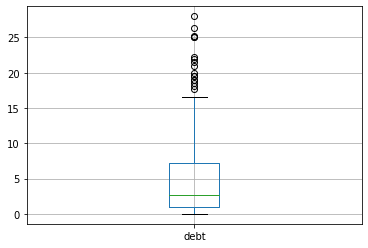

In [239]:
df.boxplot('debt')

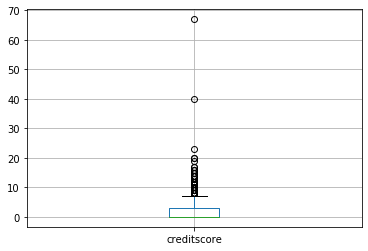

In [240]:
df.boxplot('creditscore')

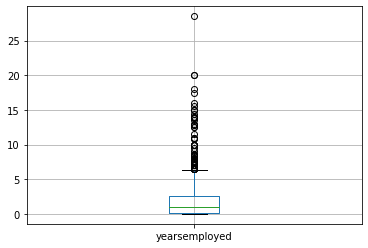

In [241]:
df.boxplot('yearsemployed')

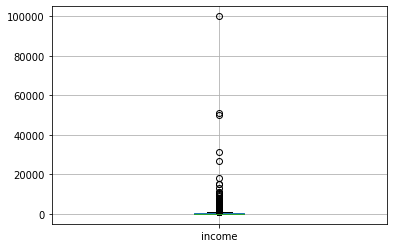

In [242]:
df.boxplot('income')

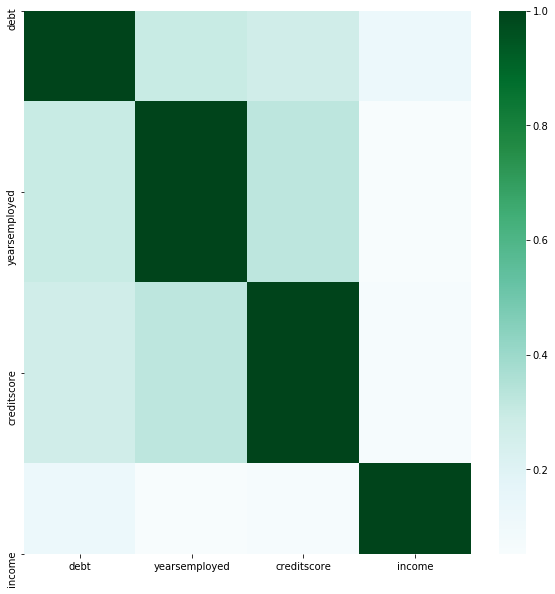

In [243]:
plt.figure(figsize=(10,10)) 
sns.heatmap(df[continuous_data_columns].corr(), cmap='BuGn')
plt.show()

## **Preprocessamento**

## Tratando nulos

In [0]:
df.replace('?',np.NaN, inplace=True)

In [0]:
df.dropna(inplace=True)

In [0]:
df.reset_index(drop=True, inplace=True)

## Normalizando dados contínuos

In [0]:
df[continuous_data_columns] = (df[continuous_data_columns] - df[continuous_data_columns].mean()) / df[continuous_data_columns].std()

In [75]:
df

,gender,age,debt,married,bankcustomer,educationlevel,ethnicity,yearsemployed,priordefault,employed,creditscore,driverslicense,citizen,zipcode,income,class
0,b,30.83,-0.960704,u,g,w,v,-0.294945,t,t,-0.302365,f,g,00202,-0.192977,+
1,a,58.67,-0.073509,u,g,q,h,0.236036,t,t,0.703976,f,g,00043,-0.086377,+
2,a,24.50,-0.861243,u,g,q,h,-0.220786,t,f,-0.503633,f,g,00280,-0.036122,+
3,b,27.83,-0.654363,u,g,w,v,0.446648,t,t,0.502708,t,g,00100,-0.192406,+
4,b,20.17,0.158236,u,g,w,v,-0.158492,t,f,-0.503633,f,s,00120,-0.192977,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
648,b,21.08,1.045432,y,p,e,h,-0.294945,f,f,-0.503633,f,g,00260,-0.192977,-
649,a,22.67,-0.811512,u,g,c,v,-0.072467,f,t,-0.101096,t,g,00200,-0.117976,-
650,a,25.25,1.724753,y,p,ff,ff,-0.072467,f,t,-0.302365,t,g,00200,-0.192786,-
651,b,17.92,-0.919925,u,g,aa,v,-0.653876,f,f,-0.503633,f,g,00280,-0.050209,-


In [0]:
df[continuous_data_columns] = (df[continuous_data_columns] - df[continuous_data_columns].min())/(df[continuous_data_columns].max() - df[continuous_data_columns].min())

In [248]:
df

,gender,age,debt,married,bankcustomer,educationlevel,ethnicity,yearsemployed,priordefault,employed,creditscore,driverslicense,citizen,zipcode,income,class
0,b,30.83,0.000000,u,g,w,v,0.043860,t,t,0.014925,f,g,00202,0.000000,+
1,a,58.67,0.159286,u,g,q,h,0.106667,t,t,0.089552,f,g,00043,0.005600,+
2,a,24.50,0.017857,u,g,q,h,0.052632,t,f,0.000000,f,g,00280,0.008240,+
3,b,27.83,0.055000,u,g,w,v,0.131579,t,t,0.074627,t,g,00100,0.000030,+
4,b,20.17,0.200893,u,g,w,v,0.060000,t,f,0.000000,f,s,00120,0.000000,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
648,b,21.08,0.360179,y,p,e,h,0.043860,f,f,0.000000,f,g,00260,0.000000,-
649,a,22.67,0.026786,u,g,c,v,0.070175,f,t,0.029851,t,g,00200,0.003940,-
650,a,25.25,0.482143,y,p,ff,ff,0.070175,f,t,0.014925,t,g,00200,0.000010,-
651,b,17.92,0.007321,u,g,aa,v,0.001404,f,f,0.000000,f,g,00280,0.007500,-


## Tratando dados categóricos

In [0]:
df = pd.get_dummies(data=df, columns=categorical_data_columns)

In [250]:
df

,age,debt,yearsemployed,creditscore,income,class,gender_a,gender_b,married_l,married_u,married_y,bankcustomer_g,bankcustomer_gg,bankcustomer_p,educationlevel_aa,educationlevel_c,educationlevel_cc,educationlevel_d,educationlevel_e,educationlevel_ff,educationlevel_i,educationlevel_j,educationlevel_k,educationlevel_m,educationlevel_q,educationlevel_r,educationlevel_w,educationlevel_x,ethnicity_bb,ethnicity_dd,ethnicity_ff,ethnicity_h,ethnicity_j,ethnicity_n,ethnicity_o,ethnicity_v,ethnicity_z,priordefault_f,priordefault_t,employed_f,...,zipcode_00396,zipcode_00399,zipcode_00400,zipcode_00408,zipcode_00410,zipcode_00416,zipcode_00420,zipcode_00422,zipcode_00431,zipcode_00432,zipcode_00434,zipcode_00440,zipcode_00443,zipcode_00450,zipcode_00454,zipcode_00455,zipcode_00460,zipcode_00465,zipcode_00470,zipcode_00480,zipcode_00487,zipcode_00491,zipcode_00500,zipcode_00510,zipcode_00515,zipcode_00519,zipcode_00520,zipcode_00523,zipcode_00550,zipcode_00560,zipcode_00583,zipcode_00600,zipcode_00640,zipcode_00680,zipcode_00711,zipcode_00720,zipcode_00760,zipcode_00840,zipcode_00980,zipcode_02000
0,30.83,0.000000,0.043860,0.014925,0.000000,+,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,58.67,0.159286,0.106667,0.089552,0.005600,+,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,24.50,0.017857,0.052632,0.000000,0.008240,+,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,27.83,0.055000,0.131579,0.074627,0.000030,+,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,20.17,0.200893,0.060000,0.000000,0.000000,+,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
648,21.08,0.360179,0.043860,0.000000,0.000000,-,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
649,22.67,0.026786,0.070175,0.029851,0.003940,-,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
650,25.25,0.482143,0.070175,0.014925,0.000010,-,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
651,17.92,0.007321,0.001404,0.000000,0.007500,-,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## **Salvando base preprocessada**

In [0]:
df.to_csv('credit_approval_preprocessed.csv', index=False, float_format='%.15f')

In [254]:
!cat credit_approval_preprocessed.csv

age,debt,yearsemployed,creditscore,income,class,gender_a,gender_b,married_l,married_u,married_y,bankcustomer_g,bankcustomer_gg,bankcustomer_p,educationlevel_aa,educationlevel_c,educationlevel_cc,educationlevel_d,educationlevel_e,educationlevel_ff,educationlevel_i,educationlevel_j,educationlevel_k,educationlevel_m,educationlevel_q,educationlevel_r,educationlevel_w,educationlevel_x,ethnicity_bb,ethnicity_dd,ethnicity_ff,ethnicity_h,ethnicity_j,ethnicity_n,ethnicity_o,ethnicity_v,ethnicity_z,priordefault_f,priordefault_t,employed_f,employed_t,driverslicense_f,driverslicense_t,citizen_g,citizen_p,citizen_s,zipcode_00000,zipcode_00017,zipcode_00020,zipcode_00021,zipcode_00022,zipcode_00024,zipcode_00028,zipcode_00029,zipcode_00030,zipcode_00032,zipcode_00040,zipcode_00043,zipcode_00045,zipcode_00049,zipcode_00050,zipcode_00052,zipcode_00056,zipcode_00060,zipcode_00062,zipcode_00070,zipcode_00073,zipcode_00075,zipcode_00076,zipcode_00080,zipcode_00086,zipcode_00088,zipcode_00092,zipcode_0009